# Практическое задание

## Задачи

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression`.
Обучить линейную модель при помощи градиентного и
стохастического градиентного спуска.
Нанести среднеквадратичную ошибку для обоих методов на один график,
сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2-регуляризации и
сравнить результаты.

3. Модернизировать решение задания 2,
заменив L2-регуляризацию на L1-регуляризацию.

## Решение

Модели:

- Линейная регрессия (на графике Linear Regression)
- Градиентный спуск (Gradient Descent)
- Стохастический градиентный спуск (Stochastic)
- Градиентный спуск с L2-регуляризацией (Ridge)
- Градиентный спуск с L1-регуляризацией (Lasso)

Выводы:

- Стохастическому градиентному спуску требуется на два порядка больше итераций,
чем базовому для достижения того же уровня точности,
но сравнивать их нужно по затраченному времени, а не числу итераций.

- Модели с регуляризацией демонстрирую скорость сходимости, сравнимую с базовой моделью,
но по непонятной причине сходятся к неверным, судя по величине ошибки, решениям.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from json import loads
from sklearn.datasets import make_regression

from linear.regression import LinearRegression
from linear.regression.descent import GradientDescent
from linear.regression.descent.stochastic import StochasticGradientDescent
from linear.regression.descent.ridge import RidgeGradientDescent
from linear.regression.descent.lasso import LassoGradientDescent

Set parameters

In [2]:
with open('problem_1.json', 'r') as file:
    param = file.read()
param = loads(param)

Make dataset

In [3]:
key = 'dataset'
X, y = make_regression(**param[key])

for _ in param['dataset'].items():
    print('{}: {}'.format(*_))

n_samples: 100
n_features: 10
n_informative: 10
n_targets: 1
bias: 0
tail_strength: 0.5
noise: 1
shuffle: True
coef: False
random_state: 42


Set gradient descent models

In [4]:
models = {
    'Gradient Descent': GradientDescent(),
    'Stochastic': StochasticGradientDescent(),
    'Ridge': RidgeGradientDescent(param['regularization']['Ridge']),
    'Lasso': LassoGradientDescent(param['regularization']['Lasso'])
}

for _ in param['regularization'].items():
    print('{}: {}'.format(*_))

Ridge: 0.09
Lasso: 0.3


Fit gradient descent models

In [5]:
convergence = {key: [] for key in models.keys()}
for key, model in models.items():
    model.fit(X, y, save_to=convergence[key], **param['fit'])

convergence = {
    key: np.array(data, dtype=object)
    for key, data in convergence.items()
}

for _ in param['fit'].items():
    print('{}: {}'.format(*_))

s: 0.1
r_min: 1e-08
r_max: 1000000.0
i_max: 10000.0


Set and fit regression model

In [6]:
key = 'Linear Regression'
models[key] = LinearRegression()
models[key].fit(X, y)

Get models errors

In [7]:
errors = {
    key: model.error(X, y)
    for key, model in models.items()
}

for _ in errors.items():
    print('{}: {:.6g}'.format(*_))

Gradient Descent: 8.41931
Stochastic: 8.48487
Ridge: 2136.66
Lasso: 10.8933
Linear Regression: 8.41931


Predict coefficients

In [8]:
# coefficients = {
#     key: np.hstack((model.intercept, model.coef))
#     for key, model in models.items()
# }

Plot convergence

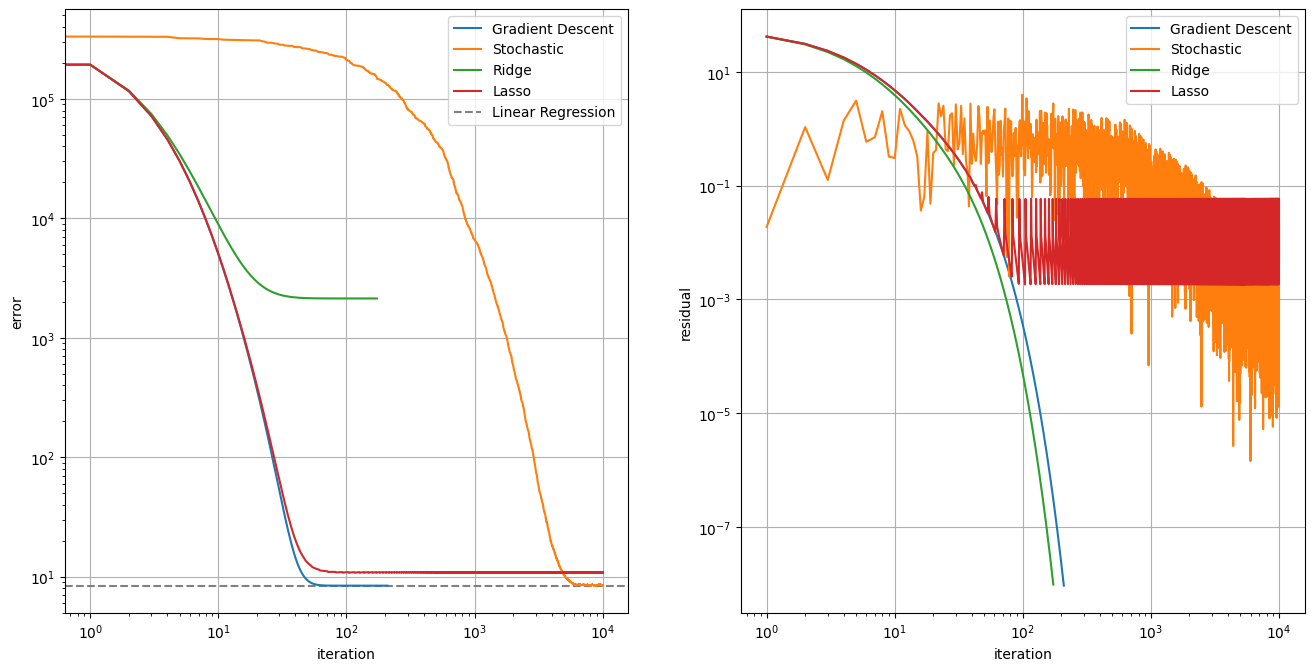

In [9]:
fig, ax = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 8), dpi=100
)

variables, index = ('iteration', 'error'), 0
indexes = [param['convergence'][variable] for variable in variables]
for key in convergence:
    data = convergence[key][:, indexes]
    ax[index].plot(*data.transpose(), label=key) 

key = 'Linear Regression'
xmin, xmax = ax[index].get_xlim()
ax[index].hlines(
    y=errors[key],
    xmin=0, xmax=1, transform=ax[index].get_yaxis_transform(), 
    linestyle = 'dashed', color='grey',
    label=key
)

ax[index].set_xscale('log')
ax[index].set_yscale('log')
ax[index].grid()
ax[index].set_xlabel(variables[0])
ax[index].set_ylabel(variables[1])
ax[index].legend()


variables, index = ('iteration', 'residual'), 1
indexes = [param['convergence'][variable] for variable in variables]
for key in convergence:
    data = convergence[key][:, indexes]
    ax[index].plot(*data.transpose(), label=key)

ax[index].set_xscale('log')
ax[index].set_yscale('log')
ax[index].grid()
ax[index].set_xlabel(variables[0])
ax[index].set_ylabel(variables[1])
ax[index].legend()

plt.show()